In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel(r'C:\Users\DELL\Downloads\Flight_Ticket_Participant_Datasets/Data_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_a=pd.read_excel(r'C:\Users\DELL\Downloads\Flight_Ticket_Participant_Datasets/Test_set.xlsx')

In [5]:
df_a.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_b=pd.read_excel(r'C:\Users\DELL\Downloads\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx')

In [7]:
df_b

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [8]:
df_c=pd.concat([df_a,df_b],axis=1)

In [9]:
df_c.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [10]:
df_new=pd.concat([df,df_c],ignore_index=True)

In [11]:
df_new

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [12]:
df_new.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
df_new.shape

(13354, 11)

In [14]:
df_new.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
df_new.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [16]:
df_new.describe()

,Price
count,13354.000000
mean,11301.720009
std,6452.843082
min,1759.000000
25%,6135.250000
50%,10262.000000
75%,14781.000000
max,79512.000000


In [17]:
#now converting some columns into interger
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Airline']=le.fit_transform(df_new['Airline'])

In [18]:
df_new['Source']=le.fit_transform(df_new['Source'])

In [19]:
df_new['Destination']=le.fit_transform(df_new['Destination'])

In [20]:
df_new['Additional_Info']=le.fit_transform(df_new['Additional_Info'])

In [21]:
df_new.drop('Route',axis=1,inplace=True)

In [22]:
df_new.drop('Total_Stops',axis=1,inplace=True)

In [23]:
df_new.drop('Additional_Info',axis=1,inplace=True)

In [24]:
df_new.Date_of_Journey=pd.to_datetime(df_new.Date_of_Journey)

In [25]:
df_new.dtypes

Airline                     int32
Date_of_Journey    datetime64[ns]
Source                      int32
Destination                 int32
Dep_Time                   object
Arrival_Time               object
Duration                   object
Price                       int64
dtype: object

In [26]:
df_new['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [27]:
df_new['Duration']=le.fit_transform(df_new['Duration'])

In [50]:
df_new['Dep_Time']=le.fit_transform(df_new['Dep_Time'])

In [51]:
df_new.drop('Arrival_Time',axis=1,inplace=True)

KeyError: "['Arrival_Time'] not found in axis"

In [ ]:
df_new.drop('Date_of_Journey',axis=1,inplace=True)

In [52]:
df_new.dtypes

Airline        int32
Source         int32
Destination    int32
Dep_Time       int32
Duration       int32
Price          int64
dtype: object

<AxesSubplot:>

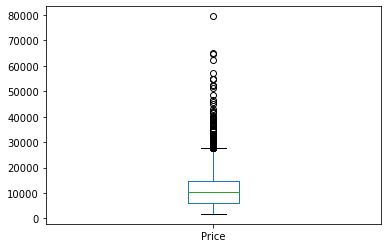

In [53]:
df_new['Price'].plot.box()

<AxesSubplot:>

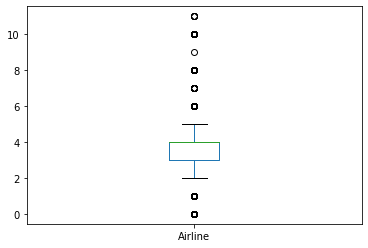

In [54]:
df_new['Airline'].plot.box()

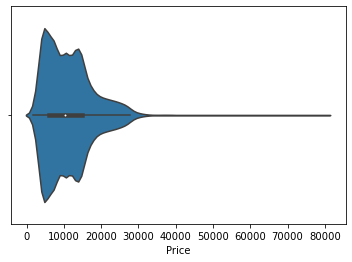

In [55]:
sns.violinplot(x='Price',data=df_new)
plt.show()

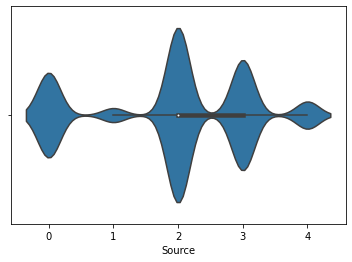

In [56]:
sns.violinplot(x='Source',data=df_new)
plt.show()

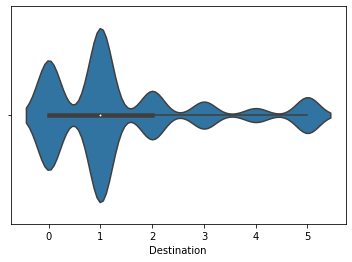

In [57]:
sns.violinplot(x='Destination',data=df_new)
plt.show()

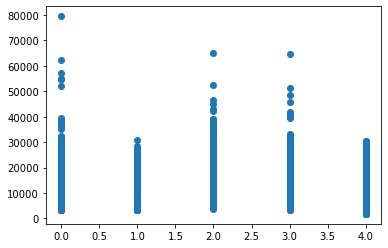

In [58]:
plt.scatter(df_new['Source'],df_new['Price'])
plt.show()

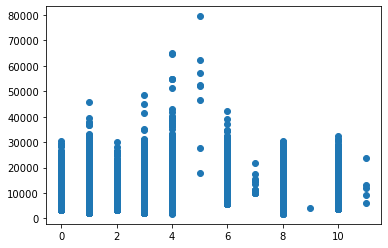

In [59]:
plt.scatter(df_new['Airline'],df_new['Price'])
plt.show()

In [60]:
df_new.skew()

Airline        0.720924
Source        -0.424151
Destination    1.247893
Dep_Time       0.193459
Duration      -0.192160
Price          1.207480
dtype: float64

In [61]:
df_new.dtypes

Airline        int32
Source         int32
Destination    int32
Dep_Time       int32
Duration       int32
Price          int64
dtype: object

In [62]:
#as we can see here,there is no need to remove skewness

In [63]:
x=df_new.drop(columns=['Price'])
y=df_new[['Price']]

In [64]:
x.shape

(13354, 5)

In [65]:
y.shape

(13354, 1)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=337)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8947, 5)
(4407, 5)
(8947, 1)
(4407, 1)


In [68]:
lm=LinearRegression()

In [69]:
lm.fit(x_train,y_train)

LinearRegression()

In [70]:
lm.coef_

array([[ -46.78902726, -237.95311794, -334.62549804,    1.80343493,
          -5.49951027]])

In [71]:
lm.intercept_

array([13253.75090161])

In [72]:
lm.score(x_train,y_train)

0.012630402256406326

In [73]:
#predict the values
pred=lm.predict(x_test)
print('predicted result price:',pred)
print('actual price',y_test)

predicted result price: [[11911.77631944]
 [11007.35008203]
 [12283.0833537 ]
 ...
 [11463.86284717]
 [11603.64237072]
 [11324.9983573 ]]
actual price        Price
3969   11125
1916    4319
742    13292
6299    4591
4724    4049
...      ...
5014   16057
11668  17223
9686    4804
5796   13759
1178    4462

[4407 rows x 1 columns]


In [75]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))

error:
mean absolute error: 5166.587966311814
mean squared error: 44775802.06666643


In [76]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.006644863593124883


In [77]:
import joblib

In [79]:
joblib.dump(lm,"predictionpricelm.obj")

['predictionpricelm.obj']